# PREDICCION DE PRECIOS DE AGUACATE EN EEUU





# Enunciado del Problema

- Los datos representan ventas semanales desde 2015 a 2018 a nivel de todos los EEUU. 
- Los datos provienen directamente de las cajas registradoras basados en ventas de aguacate variedad Hass. 
- El precio promedio de los aguacates reflejan el costo por unidad, aún cuando estos se vendan por bolsas. 
- Los códigos (Product Lookup codes ó PLU) en la tabla son solo de aguacates Hass.  No se incluyen otras variedades.

Columnas relevantes en el conjunto de datos:

- Date - la fecha de la observación
- AveragePrice - el precio promedio de una unidad
- type - convencional u orgánico
- year - el año
- Region - la ciudad o región de la observación
- Total Volume - número total de aguacates vendidos
- 4046 - número total de aguacates con PLU 4046 vendidos
- 4225 - número total de aguacates con PLU 4225 vendidos
- 4770 - número total de aguacates con PLU 4770 vendidos



# Importar las librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autogluon.tabular import TabularDataset, TabularPredictor

# Carga de datos

In [2]:
avocado = pd.read_csv('./aguacates_EEUU.csv', encoding='utf8')

# Explorar el conjunto de datos  

In [3]:
# Explorando las primeras 3 filas del avocadoFrame
avocado.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [4]:
# Explorando las últimas 5 filas del avocadoFrame
avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
# Obteniendo información del conjunto de datos
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
# Generando un resúmen estadístico
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Asegurar que estén los datos en orden cronológico

In [7]:
## convert date column to date time format
avocado['Date'] = pd.to_datetime(avocado['Date'], format='%Y-%m-%d')

In [8]:
data = avocado.sort_values('Date', ascending=False)

In [9]:
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18045,0,2018-03-25,2.02,13379.77,86.84,5923.16,98.37,7271.40,6881.80,389.60,0.00,organic,2018,RaleighGreensboro
8814,0,2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork
18153,0,2018-03-25,1.45,121917.39,1929.39,18391.86,110.05,101486.09,85313.41,16172.68,0.00,organic,2018,Southeast
9006,0,2018-03-25,1.19,450658.34,205952.19,73267.19,4313.11,167125.85,132488.40,31527.74,3109.71,conventional,2018,SouthCarolina
8994,0,2018-03-25,1.40,524265.69,103573.88,149867.07,998.53,269826.21,155866.80,113666.70,292.71,conventional,2018,Seattle
18093,0,2018-03-25,1.75,19086.94,865.91,10936.47,0.00,7284.56,7284.56,0.00,0.00,organic,2018,SanDiego
8982,0,2018-03-25,1.01,1203274.11,198289.36,895797.12,2202.74,106984.89,103033.73,186.20,3764.96,conventional,2018,SanFrancisco
17817,0,2018-03-25,1.31,36999.72,8247.81,67.33,0.00,28684.58,28094.58,590.00,0.00,organic,2018,Houston
8970,0,2018-03-25,1.10,488321.93,140383.72,156203.00,13940.11,177795.10,168263.27,7442.94,2088.89,conventional,2018,SanDiego
8958,0,2018-03-25,1.13,570446.95,135652.39,361227.57,812.10,72754.89,67652.14,624.20,4478.55,conventional,2018,Sacramento


# Realizar una gráfica de precios promedio vrs fecha

¿Cuál es la tendencia a nivel nacional?

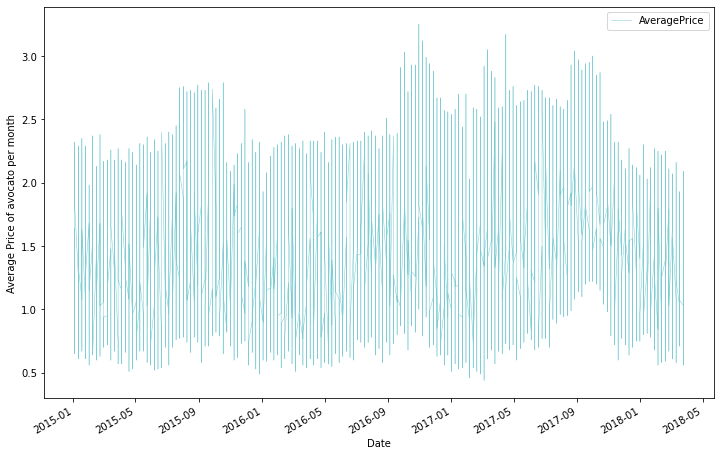

In [10]:
figsize = (12,8)
ax = data.plot(y='AveragePrice',x='Date',figsize=figsize,linewidth=0.5, color = '#7FCDD3')
ax.set_ylabel('Average Price of avocato per month')
ax.set_xlabel('Date')

plt.show()

# Realizar una gráfica de barras para ver el número de regiones

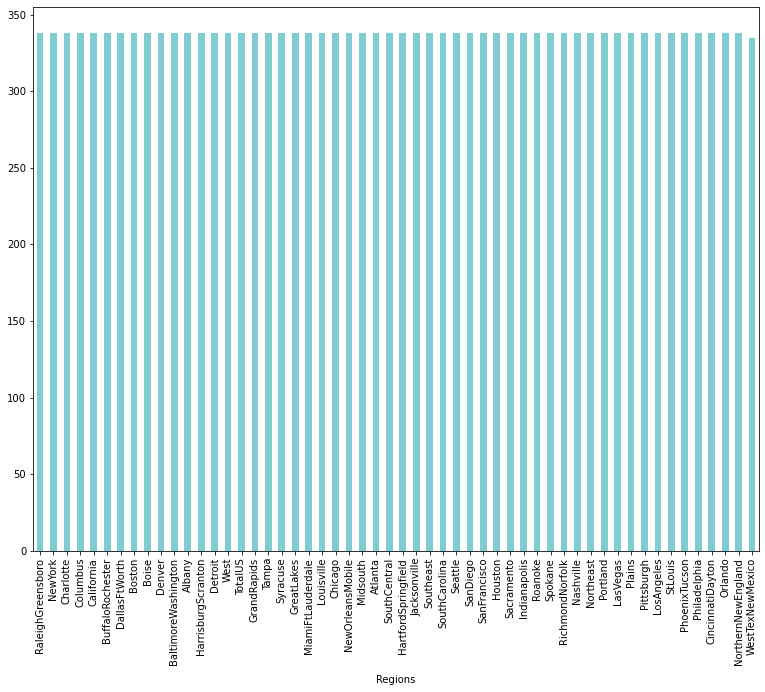

In [11]:
data['region'].value_counts().plot(kind='bar', figsize=(13,10), color = '#7FCDD3')
plt.xlabel("Regions", labelpad=10)
plt.show()

# Realizar una gráfica de barras para ver de qué años se tiene información

<AxesSubplot:title={'center':'Years of sale in the US'}, xlabel='Year'>

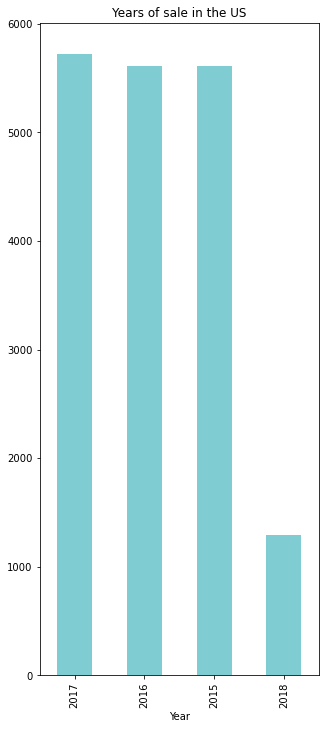

In [12]:
data['year'].value_counts().plot(kind='bar',figsize=(5,12), color = '#7FCDD3', title="Years of sale in the US", xlabel="Year")

# Preparar los datos para que se acoplen a lo que requiere el modelo a utilizar

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
# Para poder inspeccionar mejor la serie temporal en Estados Unidos
# Usando el modelo Additive
timeSerie = seasonal_decompose(data[data['region'].isin(['TotalUS'])][['AveragePrice']], model='additive ', period=12)

# Realizar predicciones

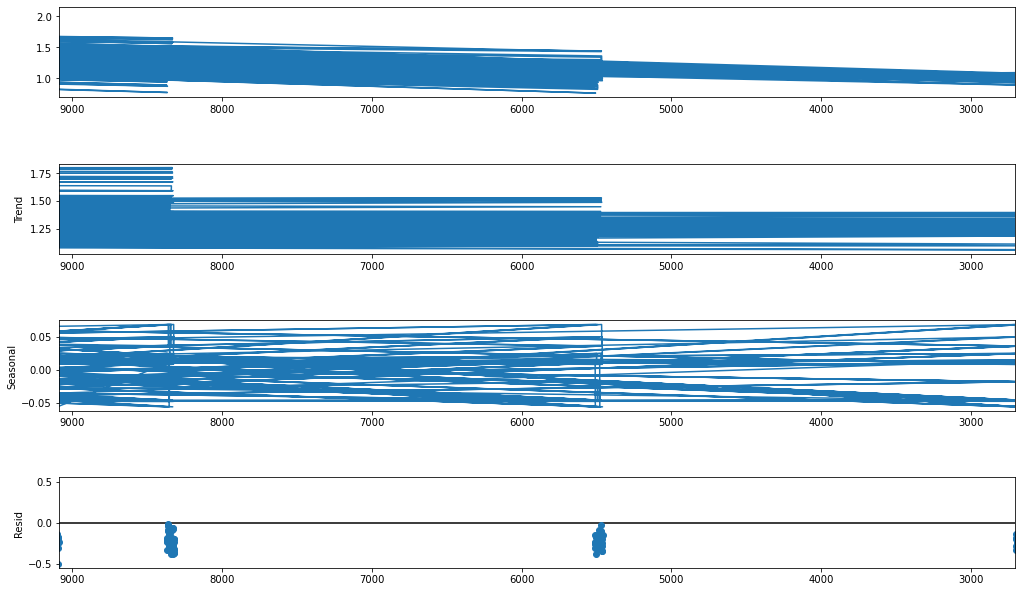

In [15]:
fig = timeSerie.plot()
fig.set_size_inches((16, 9))
plt.show()

# Creación y ajuste del modelo

In [36]:
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

data = data.rename(columns={'Total Volume': 'Total_Volume', 'Total Bags': 'Total_Bags', 'Small Bags': 'Small_Bags', 'Large Bags': 'Large_Bags', 'XLarge Bags': 'XLarge_Bags'})

model = ols("AveragePrice ~ Date + Total_Volume + region + type + year + Total_Bags", data=data).fit()

modelSummary = model.summary()
# data
modelSummary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     177.9
Date:                Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:59:41   Log-Likelihood:                 1350.3
No. Observations:               18249   AIC:                            -2251.
Df Residuals:                   18024   BIC:                            -493.0
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -0.0127      0.002     -6.028      0.000      -0.017      -0.009
Date[T.Timestamp('2015-01-11 00:00:00')]     0.0691      0.031      2.245      0.025       0.009       0.129
Date[T.Timestamp('2015-01-18 00:00:00')]     0.0895      0.031      2.908      0.004       0.029       0.150
Date[T.Timestamp('2015-01-25 00:00:00')]     0.0954      0.031      3.099      0.002       0.035       0.156
Date[T.Timestamp('2015-02-01 00:00:00')]    -0.0530      0.031     -1.723      0.085      -0.113       0.007
Date[T.Timestamp('2015-02-08 00:00:00')]     0.0092      0.031      0.298      0.766      -0.051       0.069
Date[T.Timestamp('2015-02-15 00:00:00')]     0.0858      0.031      2.788      0.005       0.025       0.146
Date[T.Timestamp('2015-02-22 00:00:00')]     0.0610      0.031      1.984      0.047       0.001       0.121
Date[T.Timestamp('2015-03-01 00:00:00')]     0.0098      0.031      0.318      0.750      -0.051       0.070
Date[T.Timestamp('2015-03-08 00:00:00')]     0.0584      0.031      1.896      0.058      -0.002       0.119
Date[T.Timestamp('2015-03-15 00:00:00')]     0.0903      0.031      2.934      0.003       0.030       0.151
Date[T.Timestamp('2015-03-22 00:00:00')]     0.0479      0.031      1.557      0.120      -0.012       0.108
Date[T.Timestamp('2015-03-29 00:00:00')]     0.0959      0.031      3.117      0.002       0.036       0.156
Date[T.Timestamp('2015-04-05 00:00:00')]     0.1114      0.031      3.621      0.000       0.051       0.172
Date[T.Timestamp('2015-04-12 00:00:00')]     0.0625      0.031      2.031      0.042       0.002       0.123
Date[T.Timestamp('2015-04-19 00:00:00')]     0.0702      0.031      2.281      0.023       0.010       0.130
Date[T.Timestamp('2015-04-26 00:00:00')]     0.0836      0.031      2.715      0.007       0.023       0.144
Date[T.Timestamp('2015-05-03 00:00:00')]    -0.0167      0.031     -0.542      0.588      -0.077       0.044
Date[T.Timestamp('2015-05-10 00:00:00')]     0.0223      0.031      0.726      0.468      -0.038       0.083
Date[T.Timestamp('2015-05-17 00:00:00')]     0.0516      0.031      1.676      0.094      -0.009       0.112
Date[T.Timestamp('2015-05-24 00:00:00')]     0.0791      0.031      2.571      0.010       0.019       0.139
Date[T.Timestamp('2015-05-31 00:00:00')]     0.0810      0.031      2.631      0.009       0.021       0.141
Date[T.Timestamp('2015-06-07 00:00:00')]     0.0796      0.031      2.586      0.010       0.019       0.140
Date[T.Timestamp('2015-06-14 00:00:00')]     0.0990      0.031      3.218      0.001       0.039       0.159
Date[T.Timestamp('2015-06-21 00:00:00')]     0.1069      0.031      3.475      0.001       0.047       0.167
Date[T.Timestamp('2015-06-28 00

# Pronosticar hacia el futuro un año (365 días)

In [41]:
pred = model.predict()
data

,Unnamed: 0,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
18045,0,2018-03-25,2.02,13379.77,86.84,5923.16,98.37,7271.40,6881.80,389.60,0.00,organic,2018,RaleighGreensboro
8814,0,2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork
18153,0,2018-03-25,1.45,121917.39,1929.39,18391.86,110.05,101486.09,85313.41,16172.68,0.00,organic,2018,Southeast
9006,0,2018-03-25,1.19,450658.34,205952.19,73267.19,4313.11,167125.85,132488.40,31527.74,3109.71,conventional,2018,SouthCarolina
8994,0,2018-03-25,1.40,524265.69,103573.88,149867.07,998.53,269826.21,155866.80,113666.70,292.71,conventional,2018,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,51,2015-01-04,1.34,8764.33,144.47,6921.75,0.00,1698.11,585.96,1112.15,0.00,organic,2015,CincinnatiDayton
9697,51,2015-01-04,1.44,3930.94,358.05,2432.81,0.00,1140.08,444.17,695.91,0.00,organic,2015,Columbus
9749,51,2015-01-04,1.35,9895.96,4634.70,1647.92,0.00,3613.34,3613.34,0.00,0.00,organic,2015,DallasFtWorth
9801,51,2015-01-04,1.42,22480.07,3199.35,6916.72,7.56,12356.44,1076.67,11279.77,0.00,organic,2015,Denver


In [45]:
start_date = '2018-01-01'
end_date = '2018-12-31'

#greater than the start date and smaller than the end date
mask = (data['Date'] > start_date) & (data['Date'] <= end_date)

pastData = data.loc[mask]

# Graficar los datos históricos y los del futuro

In [49]:
from random import randint

# 18249
futureData = [pred[randint(0, 18248)], pred[randint(0, 18248)], pred[randint(0, 18248)], pred[randint(0, 18248)], pred[randint(0, 18248)]]

C:\Users\marti\AppData\Local\Temp\ipykernel_24692\3439153362.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  futureDF = futureDF.append(newRow, ignore_index=True)
C:\Users\marti\AppData\Local\Temp\ipykernel_24692\3439153362.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  futureDF = futureDF.append(newRow, ignore_index=True)
C:\Users\marti\AppData\Local\Temp\ipykernel_24692\3439153362.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  futureDF = futureDF.append(newRow, ignore_index=True)
C:\Users\marti\AppData\Local\Temp\ipykernel_24692\3439153362.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  futureDF = futureDF.append

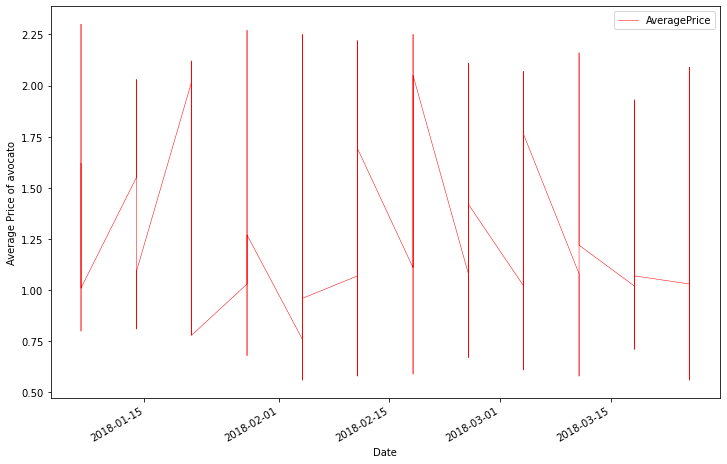

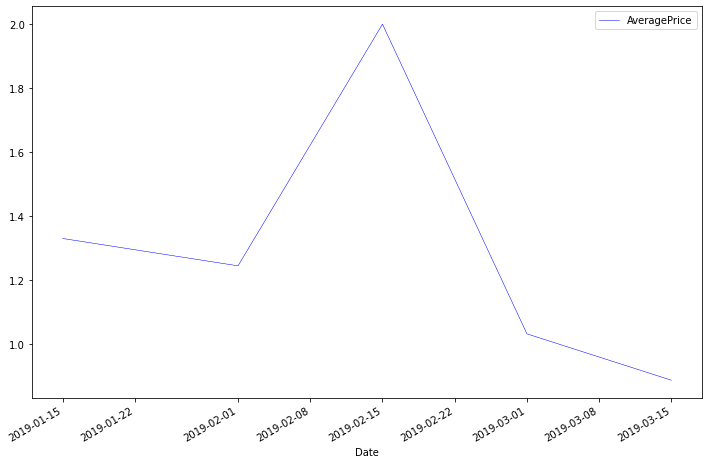

In [81]:
from datetime import datetime

# dateFormat = '%y-%m-%d'
# testDate = datetime.strptime('2019-01-15', dateFormat)
# datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

# futureMonths = [datetime.strptime('2019-01-15', dateFormat),
#  datetime.strptime('2019-02-01', dateFormat), datetime.strptime('2019-02-15', dateFormat), 
#  datetime.strptime('2019-03-01', dateFormat), datetime.strptime('2019-03-15', dateFormat)]

futureMonths = ['2019-01-15',
 '2019-02-01', '2019-02-15', 
 '2019-03-01', '2019-03-15']



futureMonths = pd.Series(futureMonths, name='Date')
futureMonths = pd.to_datetime(futureMonths)
futureMonths
# data['Date']

futureDF = pd.DataFrame({})

for i in range(len(futureData)):
  newRow = {'Date': futureMonths[i], 'AveragePrice': futureData[i]}
  futureDF = futureDF.append(newRow, ignore_index=True)


# futureData = pd.to_numeric(pd.Series(futureData, name='AveragePrice'))

# xAxis = pd.merge(data['AveragePrice'], futureData)
# data['AveragePrice']
# futureData
# len(xAxis)

figsize = (12,8)
ax = pastData.plot(y='AveragePrice',x='Date',figsize=figsize,linewidth=0.5, color = '#FF0000')
futureDF.plot(x='Date', y='AveragePrice', figsize=figsize,linewidth=0.5, color = '#0000FF')
ax.set_ylabel('Average Price of avocato')
ax.set_xlabel('Date')

plt.show()

# PARTE 2

### Repetir el ejercicio pero solo con la región oeste "West" de los EEUU

### Leer el archivo de datos

In [16]:
WestData = data[data['region'].isin(['WestTexNewMexico'])]

### Por si acaso no están ordenadas las observaciones

# Graficar el precio promedio vs fecha

### ¿Es diferente la tendencia comparado a la tendencia nacional?

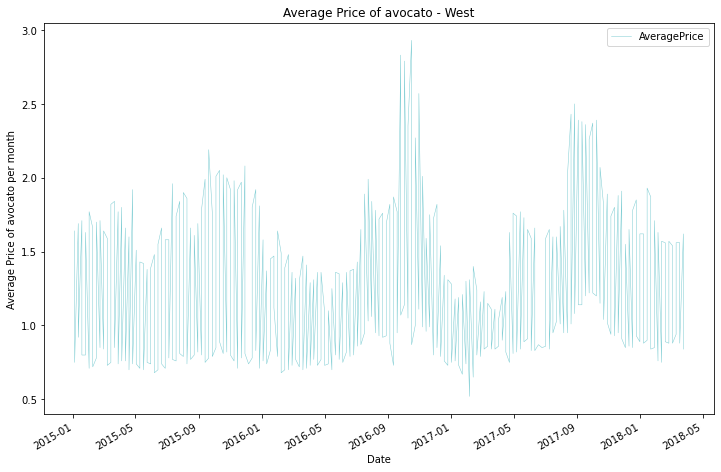

In [17]:
figsize = (12,8)
ax = WestData.plot(y='AveragePrice',x='Date',figsize=figsize,linewidth=0.5, color = '#7FCDD3')
plt.title('Average Price of avocato - West')
ax.set_ylabel('Average Price of avocato per month')
ax.set_xlabel('Date')

plt.show()

# Crear el modelo y ajustarlo con los datos

### Preparar los datos para que sean aceptados por el modelo a usar

In [18]:
# Para poder inspeccionar mejor la serie temporal en WestTextNewMexico
timeSerieWest = seasonal_decompose(WestData[['AveragePrice']], model='additive ', period=12)

# Pronosticar al futuro un año (365 días)

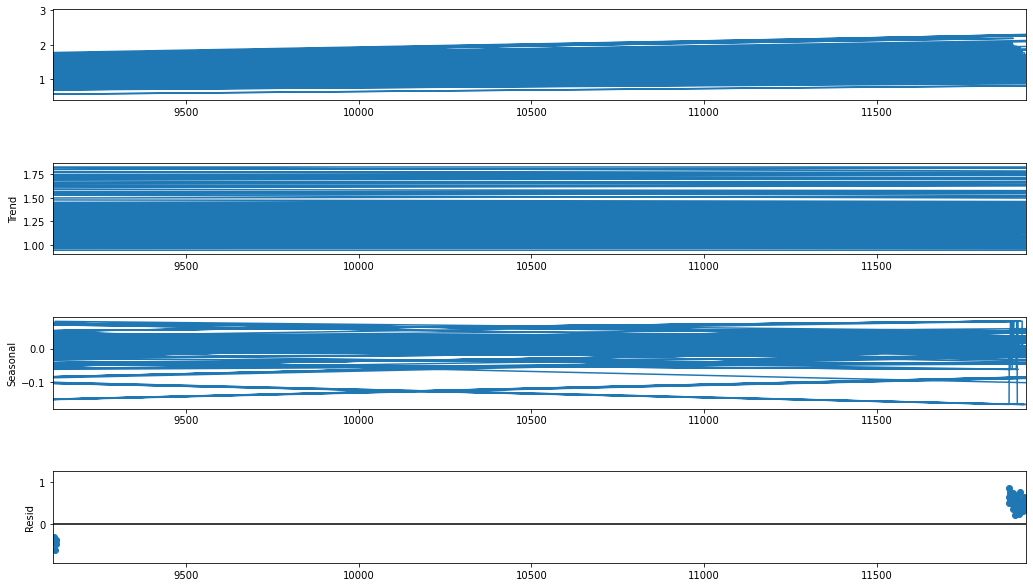

In [19]:
fig = timeSerieWest.plot()
fig.set_size_inches((16, 9))
plt.show()